### Importar librerías y dataset
Cargamos el conjunto de datos, inspeccionamos sus tipos de datos y convertimos la columna 'Date' al formato datetime.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Configuramos el estilo de los gráficos.
sns.set_style("whitegrid")
plt.style.use("seaborn-v0_8-whitegrid")

# Carga el dataset 'full_grouped.csv'.
df = pd.read_csv('../resources/full_grouped.csv')

# Inspecciona los tipos de datos para ver si 'Date' es un string (object).
# print("Tipos de datos originales:")
# df.info()

# Convierte la columna 'Date' a formato datetime.
# pd.to_datetime() es la forma idiomática y eficiente de hacer esto.
df['Date'] = pd.to_datetime(df['Date'])

# Verificamos los nuevos tipos de datos para confirmar la conversión.
# print("\nTipos de datos después de la conversión de 'Date':")
# df.info()


# Muestra las primeras filas para verificar los datos cargados.
print("\nPrimeras 5 filas del DataFrame:")
# df = df.sort_values("Date")
df = df.fillna('')  # Rellena con '' los valores con NaN
df.head()



# df.head()



Primeras 5 filas del DataFrame:


,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


### Establecer el Índice de Tiempo
Se establece la columna de fecha como el índice del DataFrame. Esto permite que la biblioteca realice operaciones de series de tiempo en forma nativa

In [112]:
# Establece la columna 'Date' como el índice del DataFrame.
df.set_index('Date', inplace=True)

# Muestra el índice del DataFrame para verificar que ahora es de tipo DatetimeIndex.
print("Índice del DataFrame después de set_index:")
print(df.index)

# Muestra las primeras filas para observar el cambio.
print("\nDataFrame con 'Date' como índice:")
# df.head()
df.tail()

Índice del DataFrame después de set_index:
DatetimeIndex(['2020-01-22', '2020-01-22', '2020-01-22', '2020-01-22',
               '2020-01-22', '2020-01-22', '2020-01-22', '2020-01-22',
               '2020-01-22', '2020-01-22',
               ...
               '2020-07-27', '2020-07-27', '2020-07-27', '2020-07-27',
               '2020-07-27', '2020-07-27', '2020-07-27', '2020-07-27',
               '2020-07-27', '2020-07-27'],
              dtype='datetime64[ns]', name='Date', length=35156, freq=None)

DataFrame con 'Date' como índice:


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
Date,,,,,,,,,
2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa
2020-07-27,Zimbabwe,2704,36,542,2126,192,2,24,Africa


### Remuestreo a Frecuencia Mensual
Esto nos permite cambiar la granularidad de nuestros datos, por ejemplo, de diario a mensual. Para ello, agrupamos los datos por el índice y aplicamos una función de agregación..

In [113]:
# %%

# Ejercicio de remuestreo: Agrupar por país y luego por mes para sumar los casos confirmados.
# Primero, seleccionamos un solo país para el ejercicio.
df_arg = df[df['Country/Region'] == 'Argentina'].copy()

# Realizamos un remuestreo a frecuencia mensual ('M') y sumamos los casos (es acumulativo de los casos confirmados).
# La operación .resample() agrupa los datos por el índice de tiempo.
monthly_cases = df_arg['Confirmed'].resample('ME').max()

# Imprimimos los resultados para ver los casos confirmados al final de cada mes.
print("Casos confirmados en Argentina a final de cada mes:")
print(monthly_cases)

Casos confirmados en Argentina a final de cada mes:
Date
2020-01-31         0
2020-02-29         0
2020-03-31      1054
2020-04-30      4428
2020-05-31     16851
2020-06-30     64530
2020-07-31    167416
Freq: ME, Name: Confirmed, dtype: int64


### Funciones de Ventana Móvil para Suavizar Datos
Estas funciones son ideales para suavizar "ruido" o reducirlo en los datos y visualizar mejor las tendencias. Aca vamos a calcular la media móvil de 7 días

In [114]:

# Seleccionamos un país para el análisis (por ejemplo, seguiremos con 'Argentina').
df_arg = df[df['Country/Region'] == 'Argentina'].copy()

# Calculamos la media móvil de 7 días para 'New cases'.
# La función .rolling() crea una ventana móvil, y .mean() calcula el promedio.
# El argumento 'window=7' especifica que la ventana es de 7 días.
df_arg['Rolling_Mean_New_Cases'] = df_arg['New cases'].rolling(window=7).mean()

# Mostramos las primeras 10 filas para ver el efecto de la media móvil.
# Los primeros 6 valores serán NaN porque la ventana no está completa.
print("Media móvil de 7 días para casos nuevos en Argentina:")
df_arg[['New cases', 'Rolling_Mean_New_Cases']].tail(20) #usamos tail y no head porque los primeros valores son NaN.

Media móvil de 7 días para casos nuevos en Argentina:


,New cases,Rolling_Mean_New_Cases
Date,,
2020-07-08,3604,2833.285714
2020-07-09,3663,2964.571429
2020-07-10,3367,3039.142857
2020-07-11,3449,3161.857143
2020-07-12,2657,3193.000000
2020-07-13,3099,3259.714286
2020-07-14,3645,3354.857143
2020-07-15,4236,3445.142857
2020-07-16,3637,3441.428571


### Visualización de la Serie de Tiempo Original vs. Suavizada
Una buena manera de comprender el efecto de las funciones de ventana móvil es a través de la visualización. En esta celda, vamos a graficar los datos de casos nuevos y su media móvil.

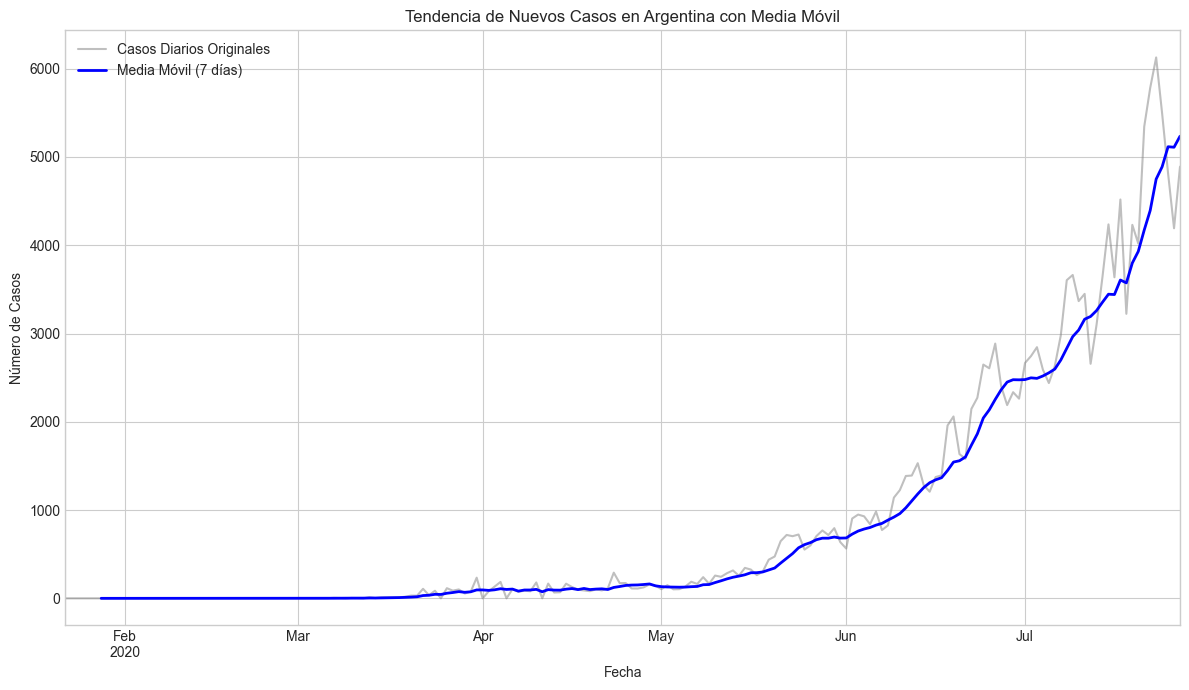

In [115]:

# Creamos un gráfico para comparar los datos originales y los suavizados.
plt.figure(figsize=(12, 7))

# Graficamos los 'New cases' como una línea fina para mostrar la volatilidad diaria.
df_arg['New cases'].plot(label='Casos Diarios Originales', alpha=0.5, color='gray')

# Graficamos la 'Rolling_Mean_New_Cases' para mostrar la tendencia suavizada.
df_arg['Rolling_Mean_New_Cases'].plot(label='Media Móvil (7 días)', linewidth=2, color='blue')

# Añadimos título, etiquetas y leyenda para una mejor comunicación.
plt.title('Tendencia de Nuevos Casos en Argentina con Media Móvil')
plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.legend()
plt.tight_layout()
plt.show()

### Comparación de Múltiples Series Temporales

Comparamos la evolución de los casos confirmados en dos paises: Argentina y España.


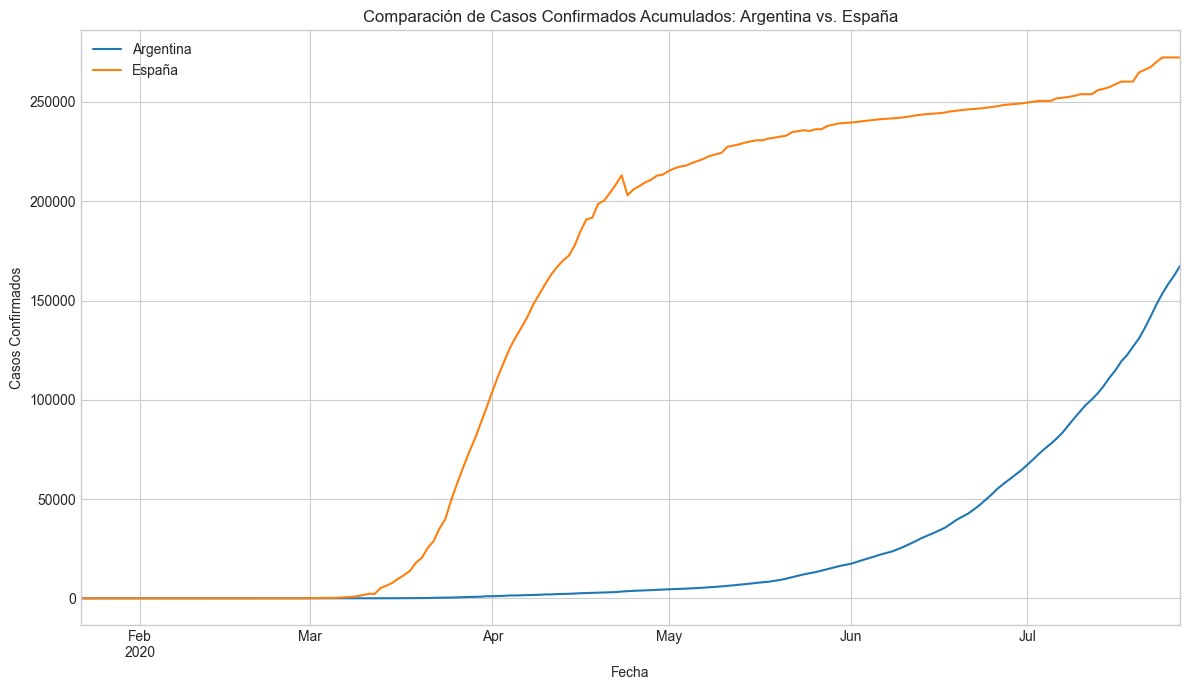

In [116]:

# Ejercicio de comparación: Selecciona dos países para comparar sus series temporales.
# Elegimos "Argentina" y "España"
df_ar = df[df['Country/Region'] == 'Argentina'].copy()
df_es = df[df['Country/Region'] == 'Spain'].copy()

# Graficamos los casos confirmados acumulados para ambos países.
plt.figure(figsize=(12, 7))

# Graficamos los datos de Argentina y España.
df_ar['Confirmed'].plot(label='Argentina')
df_es['Confirmed'].plot(label='España')

# Añadimos etiquetas, título y leyenda al gráfico.
plt.title('Comparación de Casos Confirmados Acumulados: Argentina vs. España')
plt.xlabel('Fecha')
plt.ylabel('Casos Confirmados')
plt.legend()
plt.tight_layout()
plt.show()

###  Cálculo de Cambios Diarios

A veces, interesa saber la variación diaria en lugar de los valores acumulados. Podemos calcular esto usando el método diff(), que calcula la diferencia entre un elemento y el anterior.

In [117]:
# %%
# Calculamos el cambio diario de muertes en un país, por ejemplo, 'Brasil'.
df_brazil = df[df['Country/Region'] == 'Brazil'].copy()

# La columna 'New deaths' ya existe en el dataset, pero este ejercicio
# demuestra cómo se podría calcular desde la columna 'Deaths' acumulada.
# Usamos .diff() para calcular la diferencia de un día a otro.
df_brazil['Daily_Deaths_Calc'] = df_brazil['Deaths'].diff() ##por defecto el parametro usa un intervalo de 1, pero si se quiere se puede establecer un mayor rango

# Mostramos el resultado. Los valores del dataset original deberían ser los mismos
# que los calculados, excepto el primer día, que será NaN.
print("Comparación de muertes diarias (original vs. calculado):")
df_brazil[['New deaths', 'Daily_Deaths_Calc']].tail(20) ##no usamos la funcion head dado que los primeros valores son nulos o cero

Comparación de muertes diarias (original vs. calculado):


,New deaths,Daily_Deaths_Calc
Date,,
2020-07-08,1223,1223.0
2020-07-09,1220,1220.0
2020-07-10,1214,1214.0
2020-07-11,1071,1071.0
2020-07-12,631,631.0
2020-07-13,733,733.0
2020-07-14,1300,1300.0
2020-07-15,1233,1233.0
2020-07-16,1322,1322.0


###  Filtrado y Agregación con Fechas Específicas

Este ejercicio muestra cómo filtrar datos dentro de un rango de fechas específico, que nos es útil para el análisis.

In [118]:

# Ejercicio de filtrado por rango de fechas.
# Seleccionamos un subconjunto de datos para 'Brasil'.
df_br = df[df['Country/Region'] == 'Brazil'].copy()

# Filtramos los datos para un período específico, por ejemplo, de marzo a mayo de 2020.
# Esto se puede hacer de forma sencilla con el índice de tiempo.
df_br_q2_2020 = df_br['2020-03-01':'2020-05-31']

# Agregamos los datos para ver el total de casos nuevos en este período.
total_new_cases_q2 = df_br_q2_2020['New cases'].sum()

# Imprimimos el resultado.
print(f"Total de casos nuevos en Brasil durante el segundo trimestre de 2020 --> {total_new_cases_q2}")

Total de casos nuevos en Brasil durante el segundo trimestre de 2020 --> 514847


###  Cálculo de la Tasa de Mortalidad por País
Vamos a buscar combinar el remuestreo con una operación de cálculo para determinar la tasa de mortalidad al final de cada mes para cada país.

In [119]:

# Ejercicio de tasa de mortalidad mensual por país.
# Primero, agrupamos el DataFrame por país.
grouped_by_country = df.groupby('Country/Region')

# Ahora, remuestreamos cada país mensualmente.
# Calculamos la tasa de mortalidad (Deaths / Confirmed) al final de cada mes.
monthly_mortality_rate = grouped_by_country.resample('ME', include_groups=False).apply(
    lambda x: x['Deaths'].iloc[-1] / x['Confirmed'].iloc[-1] if x['Confirmed'].iloc[-1] > 0 else 0 ##usamos iloc[-1] para asegurarnos de tomar el valor del último día del mes.
)

# Eliminamos los valores NaN que puedan surgir si no había datos en un mes.
monthly_mortality_rate.dropna(inplace=True)

# Mostramos los resultados para los primeros países.
print("Tasa de mortalidad mensual por país:")
monthly_mortality_rate.head(10)

Tasa de mortalidad mensual por país:


Date,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31
Country/Region,,,,,,,
Afghanistan,0.0,0.0,0.022989,0.029480,0.016902,0.023670,0.034994
Albania,0.0,0.0,0.061728,0.040103,0.029024,0.024458,0.029508
Algeria,0.0,0.0,0.061453,0.112332,0.069512,0.065578,0.041576
Andorra,0.0,0.0,0.031915,0.056376,0.066754,0.060819,0.057332
Angola,0.0,0.0,0.285714,0.074074,0.046512,0.045775,0.043158
Antigua and Barbuda,0.0,0.0,0.000000,0.125000,0.115385,0.043478,0.034884
Argentina,0.0,0.0,0.025617,0.049232,0.031986,0.020254,0.018272
Armenia,0.0,0.0,0.005639,0.015489,0.014113,0.017344,0.019016
Australia,0.0,0.0,0.003948,0.013745,0.014302,0.013131,0.010913


###  Tasa de Crecimiento de Casos Diarios

En este ejercicio buscamos calcular la tasa de crecimiento diario de casos nuevos con la ayuda de las funciones diff() y shift(). Por conveniencia de la libreria se utilizara pct_change() que simplifica la operacion combinada de las otras dos funciones.

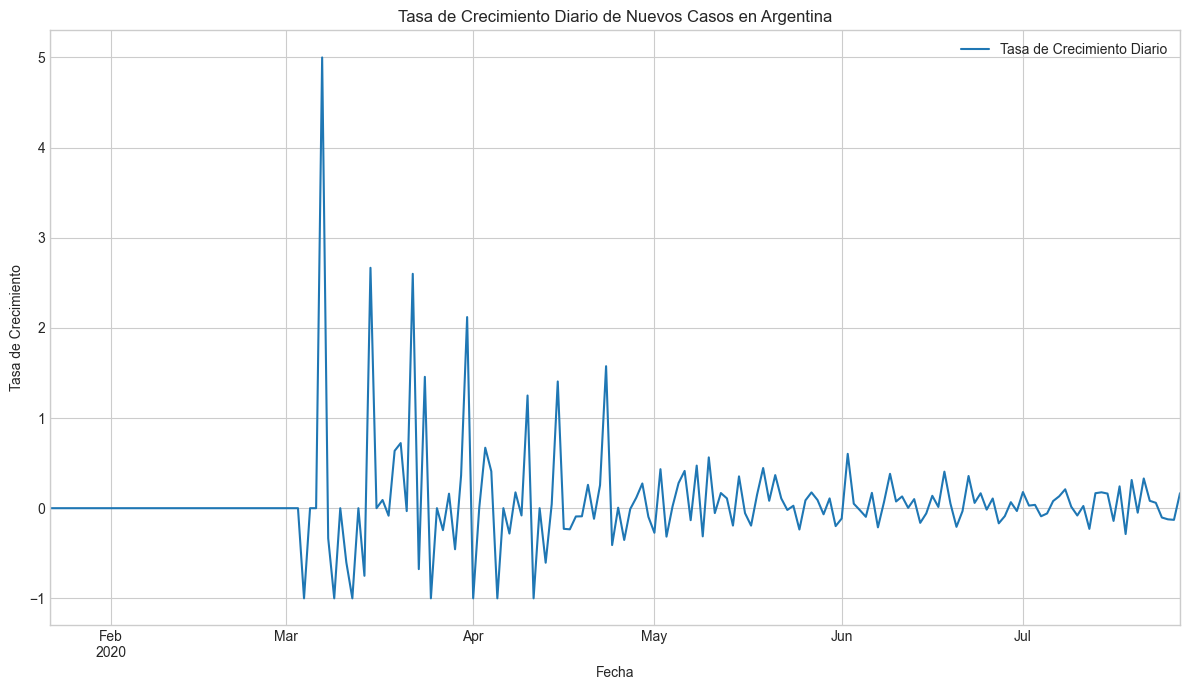


Últimas 20 filas de la tasa de crecimiento de casos nuevos en Argentina:


,New cases,New_Cases_Growth_Rate
Date,,
2020-07-08,3604,0.209802
2020-07-09,3663,0.016371
2020-07-10,3367,-0.080808
2020-07-11,3449,0.024354
2020-07-12,2657,-0.229632
2020-07-13,3099,0.166353
2020-07-14,3645,0.176186
2020-07-15,4236,0.162140
2020-07-16,3637,-0.141407


In [120]:
# Ejercicio: Tasa de crecimiento de nuevos casos en un país.
df_ar = df[df['Country/Region'] == 'Argentina'].copy()

# Calculamos el cambio porcentual de los casos nuevos.
# La operación `pct_change()` es para esto.
df_ar['New_Cases_Growth_Rate'] = df_ar['New cases'].pct_change() 

# Reemplazamos los valores infinitos que se producen cuando los casos nuevos son 0
# y los NaN por 0 para una mejor visualización.
df_ar.replace([np.inf, -np.inf], 0, inplace=True)

df_ar['New_Cases_Growth_Rate'] = df_ar['New_Cases_Growth_Rate'].fillna(0)

# Visualizamos la tasa de crecimiento diaria.
plt.figure(figsize=(12, 7))
df_ar['New_Cases_Growth_Rate'].plot(label='Tasa de Crecimiento Diario')
plt.title('Tasa de Crecimiento Diario de Nuevos Casos en Argentina')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Crecimiento')
plt.legend()
plt.tight_layout()
plt.show()

# Imprimimos las últimas 20 filas para ver el resultado numérico.
print("\nÚltimas 20 filas de la tasa de crecimiento de casos nuevos en Argentina:")
df_ar[['New cases', 'New_Cases_Growth_Rate']].tail(20)